# Visualization 

Dataset loaded successfully.

--- Dataset Info ---
Shape: (2000, 12)

First 5 rows:
    name   datetime  tempmax  tempmin  temp  feelslike  precip  windspeed  \
0  cairo 2020-01-06     17.0     10.0  13.4       13.2     0.0       42.5   
1  cairo 2020-01-07     15.0     10.8  12.4       12.4     0.0       46.4   
2  cairo 2020-01-08     16.0      8.1  12.2       10.9     0.0       40.7   
3  cairo 2020-01-09     15.0      9.0  11.9       11.3     0.7       31.7   
4  cairo 2020-01-10     16.0      8.0  12.1       11.5     0.0       31.7   

   winddir  sealevelpressure  cloudcover  season  
0    187.9            1015.5        47.0  Winter  
1    217.5            1015.7        61.0  Winter  
2    226.0            1017.5        42.7  Winter  
3    226.5            1016.8        39.3  Winter  
4    253.2            1018.4        52.7  Winter  

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column            Non-

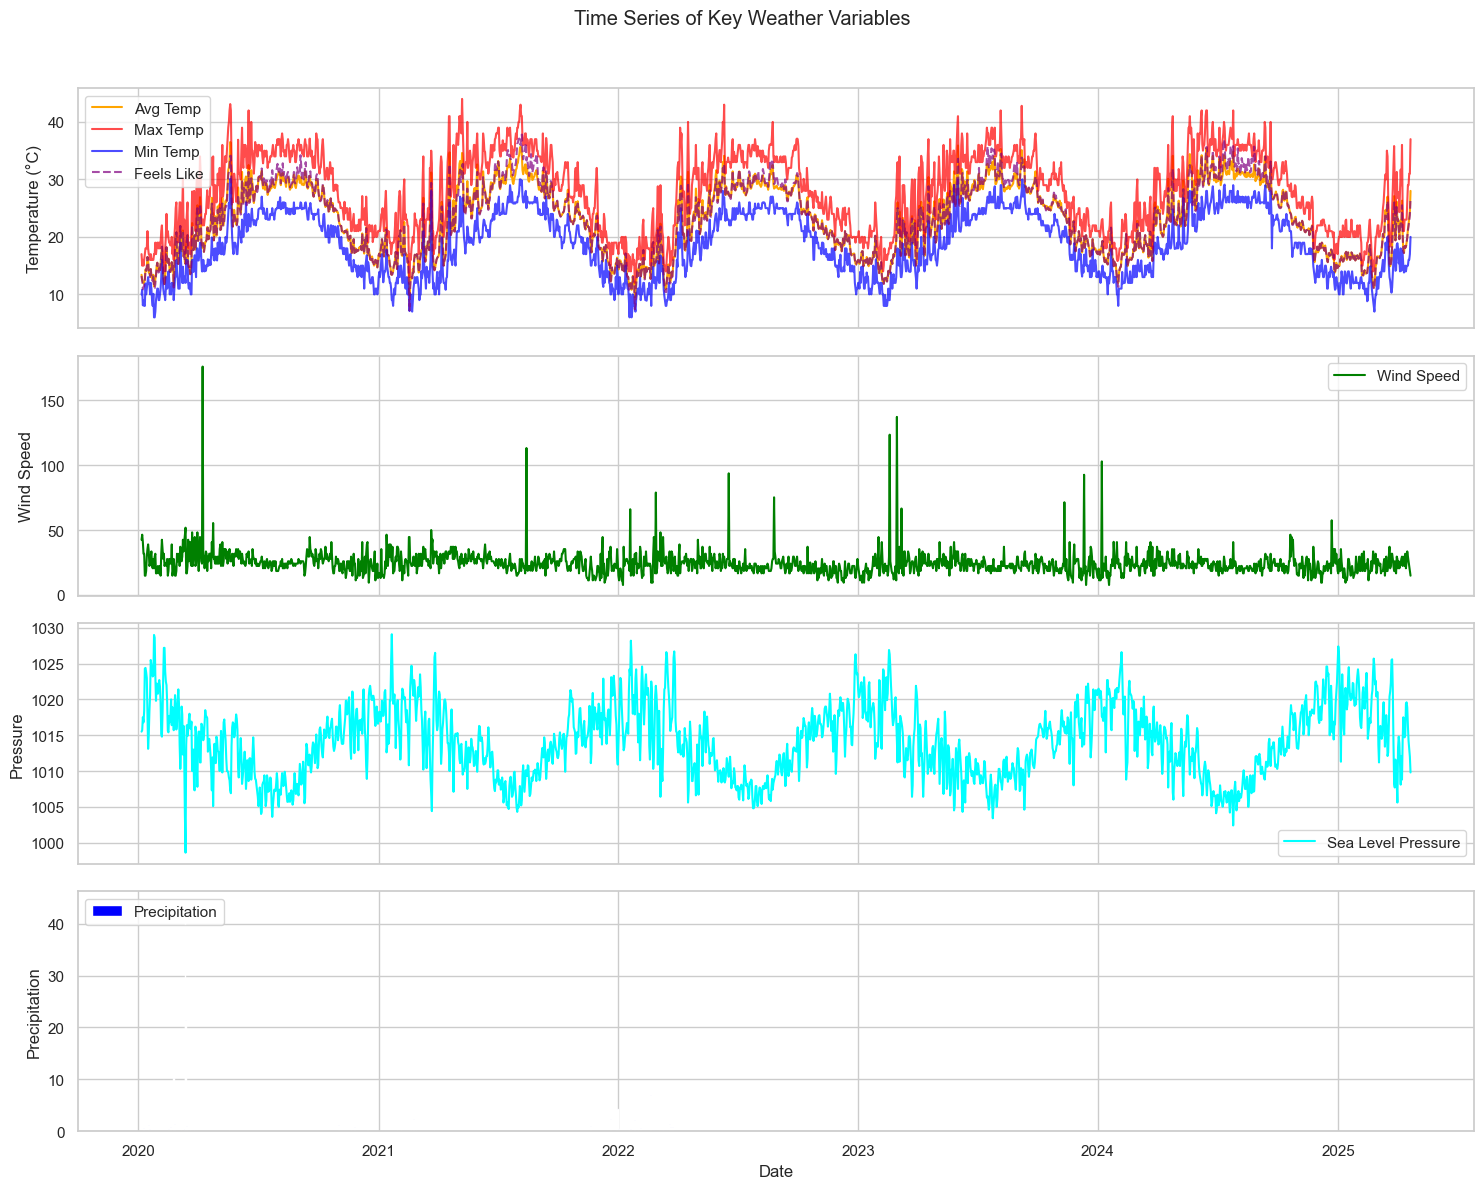

Plotting histograms...


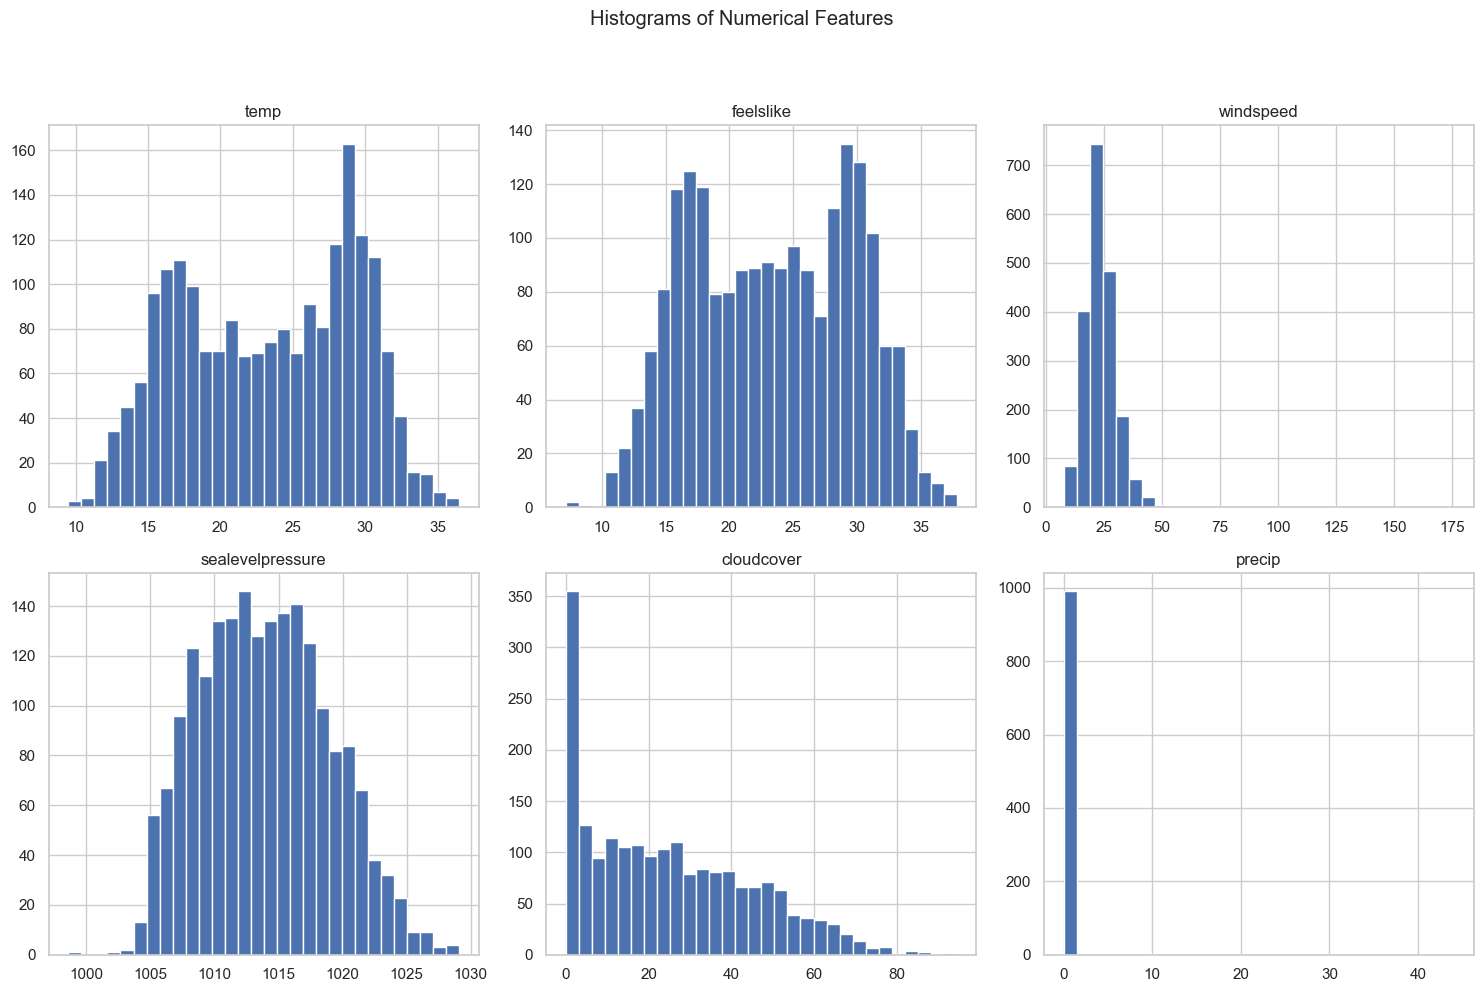

Plotting box plots...


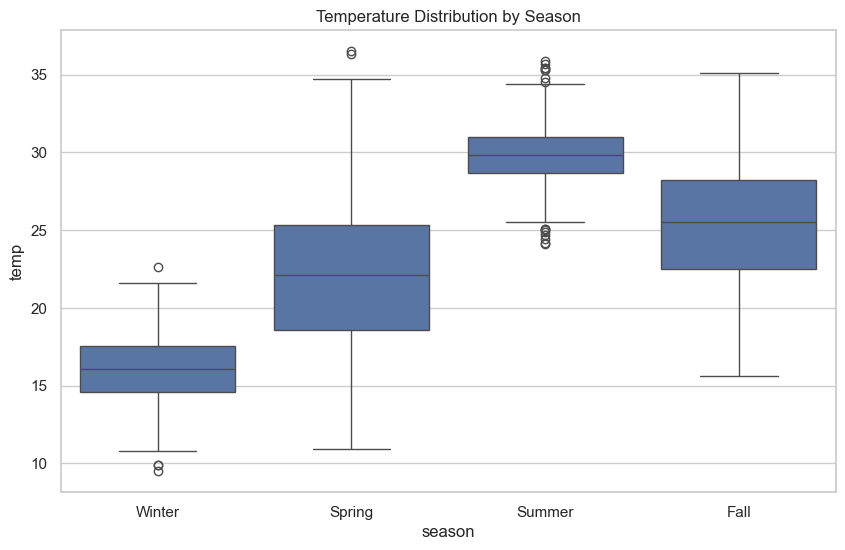

Plotting correlation heatmap...


NameError: name 'np' is not defined

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Make sure pandas is imported

# --- Configuration ---
file_path = r'D:\Weather api\cairo_merged_with_season.csv' # Use raw string for backslashes

# --- Load Data ---
try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    exit()

# Convert 'datetime' to datetime objects and handle errors
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

# Drop rows where datetime conversion failed (important for plotting)
original_rows = len(df)
df.dropna(subset=['datetime'], inplace=True)
if len(df) < original_rows:
    print(f"Warning: Dropped {original_rows - len(df)} rows due to invalid datetime format.")

# Sort data by datetime (good practice for time series plotting)
df = df.sort_values(by='datetime').reset_index(drop=True)

# --- Basic Data Info ---
print("\n--- Dataset Info ---")
print(f"Shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())
print("\nData Types:")
print(df.info())
print("\nBasic Statistics for Numerical Columns:")
# Select only numeric columns for describe()
numeric_cols = df.select_dtypes(include=['number']).columns
print(df[numeric_cols].describe())

# --- Visualization ---
print("\n--- Generating Visualizations ---")
# Set plot style
sns.set_theme(style="whitegrid")

# Ensure there's data to plot
if df.empty:
    print("Error: DataFrame is empty after processing, cannot generate plots.")
    exit()

# 1. Time Series Plots of Key Variables
print("Plotting time series...")
fig, axes = plt.subplots(4, 1, figsize=(15, 12), sharex=True) # 4 plots vertically
fig.suptitle('Time Series of Key Weather Variables', y=1.02)

# Temperature variations
axes[0].plot(df['datetime'], df['temp'], label='Avg Temp', color='orange')
axes[0].plot(df['datetime'], df['tempmax'], label='Max Temp', color='red', alpha=0.7)
axes[0].plot(df['datetime'], df['tempmin'], label='Min Temp', color='blue', alpha=0.7)
axes[0].plot(df['datetime'], df['feelslike'], label='Feels Like', color='purple', linestyle='--', alpha=0.7)
axes[0].set_ylabel('Temperature (°C)') # Assuming Celsius, adjust if needed
axes[0].legend()
axes[0].grid(True)

# Wind Speed
if 'windspeed' in df.columns:
    axes[1].plot(df['datetime'], df['windspeed'], label='Wind Speed', color='green')
    axes[1].set_ylabel('Wind Speed') # Add units if known, e.g., (km/h)
    axes[1].legend()
    axes[1].grid(True)
else:
    axes[1].text(0.5, 0.5, "'windspeed' column not found", ha='center', va='center')


# Sea Level Pressure
if 'sealevelpressure' in df.columns:
    axes[2].plot(df['datetime'], df['sealevelpressure'], label='Sea Level Pressure', color='cyan')
    axes[2].set_ylabel('Pressure') # Add units if known, e.g., (hPa)
    axes[2].legend()
    axes[2].grid(True)
else:
     axes[2].text(0.5, 0.5, "'sealevelpressure' column not found", ha='center', va='center')


# Precipitation
if 'precip' in df.columns:
    # Use a bar plot for precipitation as it's often zero
    axes[3].bar(df['datetime'], df['precip'], label='Precipitation', color='blue', width=1.0) # Adjust width as needed
    axes[3].set_ylabel('Precipitation') # Add units if known, e.g., (mm)
    axes[3].legend()
    axes[3].grid(True)
else:
     axes[3].text(0.5, 0.5, "'precip' column not found", ha='center', va='center')


plt.xlabel('Date')
plt.tight_layout(rect=[0, 0.03, 1, 1]) # Adjust layout to prevent title overlap
plt.show()

# 2. Histograms for Numerical Feature Distributions
print("Plotting histograms...")
numerical_cols_for_hist = ['temp', 'feelslike', 'windspeed', 'sealevelpressure', 'cloudcover', 'precip']
# Filter out columns not present in the DataFrame
numerical_cols_for_hist = [col for col in numerical_cols_for_hist if col in df.columns and pd.api.types.is_numeric_dtype(df[col])]

if numerical_cols_for_hist:
    df[numerical_cols_for_hist].hist(bins=30, figsize=(15, 10), layout=(-1, 3)) # Adjust layout columns as needed
    plt.suptitle('Histograms of Numerical Features', y=1.02)
    plt.tight_layout(rect=[0, 0.03, 1, 0.98])
    plt.show()
else:
    print("No suitable numerical columns found for histograms.")


# 3. Box Plots (Example: Temperature by Season)
print("Plotting box plots...")
if 'season' in df.columns and 'temp' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='season', y='temp', data=df, order=['Winter', 'Spring', 'Summer', 'Fall']) # Optional: specify order
    plt.title('Temperature Distribution by Season')
    plt.show()
else:
    print("Skipping box plot: 'season' or 'temp' column not found.")

# 4. Correlation Heatmap for Numerical Features
print("Plotting correlation heatmap...")
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=np.number)
if not numeric_df.empty:
    plt.figure(figsize=(12, 8))
    correlation_matrix = numeric_df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Correlation Matrix of Numerical Features')
    plt.show()
else:
    print("No numerical columns found for correlation heatmap.")


# 5. Count Plot for Categorical Features (Example: Season)
print("Plotting count plot for Season...")
if 'season' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x='season', data=df, order=['Winter', 'Spring', 'Summer', 'Fall']) # Optional: specify order
    plt.title('Frequency of Seasons')
    plt.show()
else:
    print("Skipping count plot: 'season' column not found.")

# Example: Count plot for Wind Direction (if categorical)
if 'winddir' in df.columns and not pd.api.types.is_numeric_dtype(df['winddir']):
    print("Plotting count plot for Wind Direction...")
    # If there are too many unique directions, this plot might be crowded
    unique_winddirs = df['winddir'].nunique()
    if unique_winddirs > 20:
         print(f"Warning: High number of unique wind directions ({unique_winddirs}). Plot might be cluttered.")
         # Consider plotting only the top N directions
         top_n = 15
         top_dirs = df['winddir'].value_counts().nlargest(top_n).index
         df_filtered = df[df['winddir'].isin(top_dirs)]
         plt.figure(figsize=(12, 6))
         sns.countplot(y='winddir', data=df_filtered, order = top_dirs) # Use y for horizontal bars if many categories
         plt.title(f'Frequency of Top {top_n} Wind Directions')
         plt.tight_layout()
         plt.show()

    else:
        plt.figure(figsize=(10, 6))
        sns.countplot(x='winddir', data=df)
        plt.title('Frequency of Wind Directions')
        plt.xticks(rotation=45, ha='right') # Rotate labels if they overlap
        plt.tight_layout()
        plt.show()

elif 'winddir' in df.columns and pd.api.types.is_numeric_dtype(df['winddir']):
     print("Skipping count plot for 'winddir' as it appears to be numerical. Consider a histogram instead.")
else:
     print("Skipping count plot: 'winddir' column not found.")


print("\n--- Visualizations Finished ---")

# --- Optional: Add rest of your script here (feature engineering, splitting, training, etc.) ---
# ... (your existing code for model training) ...